#  Concentration de CO2 dans l'atmosphère depuis 1958

## Introduction
Le but de cette étude est d'analyser l'évolution de la concentration en CO2 dans l'atmosphère, en mettant en pratique les outils de recherche reproductible.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

In [2]:
#raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv", skiprows = 54, sep=r'\s*,\s*', engine='python')
raw_data = pd.read_csv("monthly_in_situ_co2_mlo.csv", skiprows = 54, sep=r'\s*,\s*', engine='python')

Les données ont été extraites le 11/05/2020. On travaillera avec une copie locale mais la ligne commentée permet le téléchargement des données à la source. 
Les 54 premières lignes correspondent à du texte contenant les références à citer, des explications sur la forme des données ... On les supprime donc pour permettre à Pandas de lire les données sous forme de tableau. 

In [3]:
raw_data

Yr    Mn   Date     Date.1     CO2 seasonally     fit  seasonally.1  \
0       NaN   NaN    NaN        NaN     NaN   adjusted     NaN  adjusted fit   
1       NaN   NaN  Excel        NaN   [ppm]      [ppm]   [ppm]         [ppm]   
2    1958.0   1.0  21200  1958.0411  -99.99     -99.99  -99.99        -99.99   
3    1958.0   2.0  21231  1958.1260  -99.99     -99.99  -99.99        -99.99   
4    1958.0   3.0  21259  1958.2027  315.70     314.44  316.18        314.90   
5    1958.0   4.0  21290  1958.2877  317.46     315.16  317.29        314.98   
6    1958.0   5.0  21320  1958.3699  317.51     314.71  317.86        315.06   
7    1958.0   6.0  21351  1958.4548  -99.99     -99.99  317.24        315.14   
8    1958.0   7.0  21381  1958.5370  315.86     315.19  315.86        315.21   
9    1958.0   8.0  21412  1958.6219  314.93     316.19  313.99        315.28   
10   1958.0   9.0  21443  1958.7068  313.21     316.08  312.45        315.35   
11   1958.0  10.0  21473  1958.7890  -99.99     -99.99  312.43        315.40   
12   1958.0  11.0  21504  1958.8740  313.33     315.20  313.61        315.46   
13   1958.0  12.0  21534  1958.9562  314.67     315.43  314.76        315.51   
14   1959.0   1.0  21565  1959.0411  315.58     315.54  315.62        315.57   
15   1959.0   2.0  21596  1959.1260  316.49     315.86  316.27        315.63   
16   1959.0   3.0  21624  1959.2027  316.65     315.38  316.98        315.69   
17   1959.0   4.0  21655  1959.2877  317.72     315.42  318.09        315.77   
18   1959.0   5.0  21685  1959.3699  318.29     315.49  318.65        315.85   
19   1959.0   6.0  21716  1959.4548  318.15     316.03  318.04        315.94   
20   1959.0   7.0  21746  1959.5370  316.54     315.86  316.67        316.03   
21   1959.0   8.0  21777  1959.6219  314.80     316.06  314.82        316.12   
22   1959.0   9.0  21808  1959.7068  313.84     316.73  313.31        316.22   
23   1959.0  10.0  21838  1959.7890  313.33     316.33  313.32        316.30   
24   1959.0  11.0  21869  1959.8740  314.81     316.68  314.54        316.39   
25   1959.0  12.0  21899  1959.9562  315.58     316.35  315.72        316.47   
26   1960.0   1.0  21930  1960.0410  316.43     316.39  316.61        316.56   
27   1960.0   2.0  21961  1960.1257  316.98     316.35  317.27        316.64   
28   1960.0   3.0  21990  1960.2049  317.58     316.28  318.03        316.71   
29   1960.0   4.0  22021  1960.2896  319.03     316.70  319.14        316.79   
..      ...   ...    ...        ...     ...        ...     ...           ...   
728  2018.0   7.0  43296  2018.5370  408.90     408.08  409.44        408.65   
729  2018.0   8.0  43327  2018.6219  407.10     408.63  407.34        408.91   
730  2018.0   9.0  43358  2018.7068  405.59     409.08  405.67        409.19   
731  2018.0  10.0  43388  2018.7890  405.99     409.61  405.85        409.45   
732  2018.0  11.0  43419  2018.8740  408.12     410.38  407.49        409.73   
733  2018.0  12.0  43449  2018.9562  409.23     410.15  409.08        409.99   
734  2019.0   1.0  43480  2019.0411  410.92     410.87  410.31        410.25   
735  2019.0   2.0  43511  2019.1260  411.66     410.90  411.26        410.49   
736  2019.0   3.0  43539  2019.2027  412.00     410.46  412.26        410.70   
737  2019.0   4.0  43570  2019.2877  413.52     410.72  413.75        410.93   
738  2019.0   5.0  43600  2019.3699  414.83     411.42  414.55        411.15   
739  2019.0   6.0  43631  2019.4548  413.96     411.38  413.92        411.37   
740  2019.0   7.0  43661  2019.5370  411.85     411.03  412.37        411.58   
741  2019.0   8.0  43692  2019.6219  410.08     411.62  410.23        411.80   
742  2019.0   9.0  43723  2019.7068  408.55     412.06  408.50        412.03   
743  2019.0  10.0  43753  2019.7890  408.43     412.06  408.63        412.24   
744  2019.0  11.0  43784  2019.8740  410.29     412.56  410.22        412.47   
745  2019.0  12.0  43814  2019.9562  411.85     412.78  411.77        412.68   
746  2020

Les deux premières lignes contiennent des unités et non des valeurs, on les retire du tableau pour l'instant.

In [4]:
data = raw_data.iloc[2:]

Pour ce jeu de données, les 4 premières colonnes sont des dates, et seule la colonne 5 contient des mesures brutes. Nous allons conserver uniquement les informations sur l'année, le mois, et la valeur brute de la mesure.

In [5]:
useful_data = data.iloc[0:len(data.index), [0,1,4]]
#useful_data

On  vérifie que les données ont un type approprié.

In [6]:
print(type(useful_data['Yr'][3]), useful_data['Yr'][3])
print(type(useful_data['Mn'][3]), useful_data['Mn'][3])
print(type(useful_data['CO2'][3]), useful_data['CO2'][3])

<class 'numpy.float64'> 1958.0
<class 'numpy.float64'> 2.0
<class 'str'> -99.99


On voit que la troisième colonne n'est pas bien interprétée, peut être à cause du signe '-'. On essaye de convertir les données.

In [7]:
useful_data['CO2'] = useful_data['CO2'].astype(float)

Les explications jointes au fichier indiquent que les valeurs manquantes sont remplacées par la valeur -99.99. On souhaite donc supprimer chaque ligne comportant cette valeur.

In [8]:
liste = []
for i in range(len(useful_data.index)):
    try:
        if(useful_data['CO2'][useful_data.index[i]] == -99.99):
            liste.append(useful_data.index[i])
    except:
        print(i, ' ', end='')
print(liste)
useful_data.drop(liste, inplace=True)

[2, 3, 7, 11, 75, 76, 77, 750, 751, 752, 753, 754, 755, 756, 757]


In [9]:
useful_data
useful_data_copie = pd.DataFrame.copy(useful_data, deep = True)

On souhaite maintenant convertir l'année et le mois en un format plus adapté à Pandas, et à l'utiliser comme index. Un méthode possible est présentée ici, en rassemblant les deux informations puis en appliquant une fonction pour une mise au format Pandas.

In [10]:
useful_data['period'] = useful_data['Yr']*100 + useful_data['Mn']

In [11]:
useful_data['period'] = useful_data['period'].astype(int)

In [12]:
useful_data = useful_data.iloc[0:len(useful_data.index), [2,3]]

In [13]:
def convertIntoPeriod(anneeEtMois):
    y = (int)(anneeEtMois/100)
    m = (int)(anneeEtMois%100)
    return pd.Period(pd.Timestamp(y,m,1), 'M')
useful_data['period'] = [convertIntoPeriod(date) for date in useful_data['period']]
useful_data.set_index('period')

CO2
period         
1958-03  315.70
1958-04  317.46
1958-05  317.51
1958-07  315.86
1958-08  314.93
1958-09  313.21
1958-11  313.33
1958-12  314.67
1959-01  315.58
1959-02  316.49
1959-03  316.65
1959-04  317.72
1959-05  318.29
1959-06  318.15
1959-07  316.54
1959-08  314.80
1959-09  313.84
1959-10  313.33
1959-11  314.81
1959-12  315.58
1960-01  316.43
1960-02  316.98
1960-03  317.58
1960-04  319.03
1960-05  320.04
1960-06  319.58
1960-07  318.18
1960-08  315.90
1960-09  314.17
1960-10  313.83
...         ...
2017-11  405.17
2017-12  406.75
2018-01  408.05
2018-02  408.34
2018-03  409.25
2018-04  410.30
2018-05  411.30
2018-06  410.88
2018-07  408.90
2018-08  407.10
2018-09  405.59
2018-10  405.99
2018-11  408.12
2018-12  409.23
2019-01  410.92
2019-02  411.66
2019-03  412.00
2019-04  413.52
2019-05  414.83
2019-06  413.96
2019-07  411.85
2019-08  410.08
2019-09  408.55
2019-10  408.43
2019-11  410.29
2019-12  411.85
2020-01  413.37
2020-02  414.09
2020-03  414.51
2020-04  416.18

[741 rows x 1 columns]

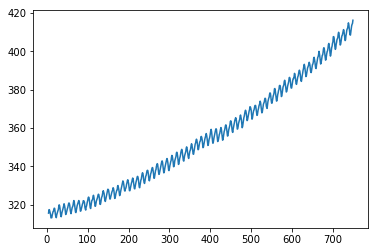

In [14]:
useful_data['CO2'].plot()

On a un premier aperçu de nos données, mais l'échelle ne correspond pas à ce que nous voulons. De plus, il va être difficile avec des données manquantes de travailler proprement avec ces indices. On va donc repartir d'une copie de useful_data, et renseigner la date sous la forme du nombre de mois en partant de l'an 1958. Janvier 1959 sera donc référencé par "13", etc.

In [15]:
udc = useful_data_copie
udc['IndexMois'] = [(int)(udc['Mn'][x] + (udc['Yr'][x] - 1958)*12) for x in udc.index]
udc

Yr    Mn     CO2  IndexMois
4    1958.0   3.0  315.70          3
5    1958.0   4.0  317.46          4
6    1958.0   5.0  317.51          5
8    1958.0   7.0  315.86          7
9    1958.0   8.0  314.93          8
10   1958.0   9.0  313.21          9
12   1958.0  11.0  313.33         11
13   1958.0  12.0  314.67         12
14   1959.0   1.0  315.58         13
15   1959.0   2.0  316.49         14
16   1959.0   3.0  316.65         15
17   1959.0   4.0  317.72         16
18   1959.0   5.0  318.29         17
19   1959.0   6.0  318.15         18
20   1959.0   7.0  316.54         19
21   1959.0   8.0  314.80         20
22   1959.0   9.0  313.84         21
23   1959.0  10.0  313.33         22
24   1959.0  11.0  314.81         23
25   1959.0  12.0  315.58         24
26   1960.0   1.0  316.43         25
27   1960.0   2.0  316.98         26
28   1960.0   3.0  317.58         27
29   1960.0   4.0  319.03         28
30   1960.0   5.0  320.04         29
31   1960.0   6.0  319.58         30
32   1960.0   7.0  318.18         31
33   1960.0   8.0  315.90         32
34   1960.0   9.0  314.17         33
35   1960.0  10.0  313.83         34
..      ...   ...     ...        ...
720  2017.0  11.0  405.17        719
721  2017.0  12.0  406.75        720
722  2018.0   1.0  408.05        721
723  2018.0   2.0  408.34        722
724  2018.0   3.0  409.25        723
725  2018.0   4.0  410.30        724
726  2018.0   5.0  411.30        725
727  2018.0   6.0  410.88        726
728  2018.0   7.0  408.90        727
729  2018.0   8.0  407.10        728
730  2018.0   9.0  405.59        729
731  2018.0  10.0  405.99        730
732  2018.0  11.0  408.12        731
733  2018.0  12.0  409.23        732
734  2019.0   1.0  410.92        733
735  2019.0   2.0  411.66        734
736  2019.0   3.0  412.00        735
737  2019.0   4.0  413.52        736
738  2019.0   5.0  414.83        737
739  2019.0   6.0  413.96        738
740  2019.0   7.0  411.85        739
741  2019.0   8.0  410.08        740
742  2019.0   9.0  408.55        741
743  2019.0  10.0  408.43        742
744  2019.0  11.0  410.29        743
745  2019.0  12.0  411.85        744
746  2020.0   1.0  413.37        745
747  2020.0   2.0  414.09        746
748  2020.0   3.0  414.51        747
749  2020.0   4.0  416.18        748

[741 rows x 4 columns]

On vérifie à l'aide de la dernière valeur que tout est correct :

In [16]:
testIndex = (2020 - 1958)*12 + 4
testIndex

748

On utilise notre nouvelle colonne comme index et on supprime les autres.

In [17]:
del udc['Yr']
del udc['Mn']
udc.reset_index()
udc.set_index('IndexMois')
udc

CO2  IndexMois
4    315.70          3
5    317.46          4
6    317.51          5
8    315.86          7
9    314.93          8
10   313.21          9
12   313.33         11
13   314.67         12
14   315.58         13
15   316.49         14
16   316.65         15
17   317.72         16
18   318.29         17
19   318.15         18
20   316.54         19
21   314.80         20
22   313.84         21
23   313.33         22
24   314.81         23
25   315.58         24
26   316.43         25
27   316.98         26
28   317.58         27
29   319.03         28
30   320.04         29
31   319.58         30
32   318.18         31
33   315.90         32
34   314.17         33
35   313.83         34
..      ...        ...
720  405.17        719
721  406.75        720
722  408.05        721
723  408.34        722
724  409.25        723
725  410.30        724
726  411.30        725
727  410.88        726
728  408.90        727
729  407.10        728
730  405.59        729
731  405.99        730
732  408.12        731
733  409.23        732
734  410.92        733
735  411.66        734
736  412.00        735
737  413.52        736
738  414.83        737
739  413.96        738
740  411.85        739
741  410.08        740
742  408.55        741
743  408.43        742
744  410.29        743
745  411.85        744
746  413.37        745
747  414.09        746
748  414.51        747
749  416.18        748

[741 rows x 2 columns]

Pour une raison quelconque Pandas refuse d'indexer correctement le tableau ... Tant pis. On utilisera la colonne IndexMois en guise d'abscisses pour les plots.

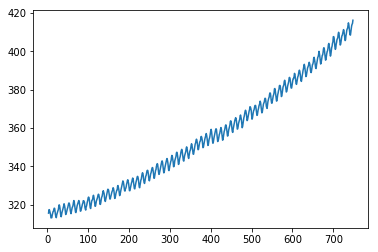

In [18]:
plt.plot(udc['IndexMois'], udc['CO2'])

On vérifie la façon dont les données manquantes sont gérées.

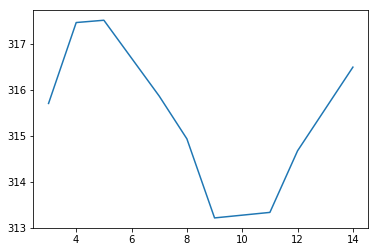

In [19]:
plt.plot(udc['IndexMois'][0:10], udc['CO2'][0:10])

In [20]:
print(udc['IndexMois'][0:10], udc['CO2'][0:10])

4      3
5      4
6      5
8      7
9      8
10     9
12    11
13    12
14    13
15    14
Name: IndexMois, dtype: int64 4     315.70
5     317.46
6     317.51
8     315.86
9     314.93
10    313.21
12    313.33
13    314.67
14    315.58
15    316.49
Name: CO2, dtype: float64


On voit que la valeur 6 en abscisse n'a pas d'ordonnée, et que la droite est tracée entre les points 5 et 7. Il n'y a pas de problème. 

On peut s'intéresser maintenant aux résultats. On voit une croissance globale, et des oscillations locales. On peut zoomer sur trois années pour voir ce qu'il se passe localement par exemple.

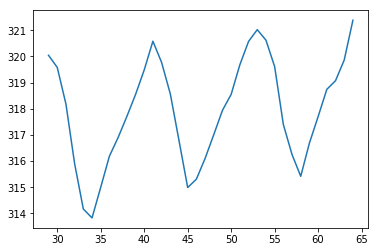

In [21]:
plt.plot(udc['IndexMois'][24:60], udc['CO2'][24:60])

In [22]:
for i in range(29,61):
    print(i, i%12, end=' / ')

29 5 / 30 6 / 31 7 / 32 8 / 33 9 / 34 10 / 35 11 / 36 0 / 37 1 / 38 2 / 39 3 / 40 4 / 41 5 / 42 6 / 43 7 / 44 8 / 45 9 / 46 10 / 47 11 / 48 0 / 49 1 / 50 2 / 51 3 / 52 4 / 53 5 / 54 6 / 55 7 / 56 8 / 57 9 / 58 10 / 59 11 / 60 0 / 

On voit des minima locaux aux abscisses 34, 45, 58 qui correspondent aux mois Octobre, Septembre, Octobre. Il semble donc que la concentration en CO2 soit périodiquement minimale à cette période de l'année. De même, on voit des maxima locaux aux abscisses 41 et 54, soit en mai et juin. On peut faire une autre vérification par précaution.

400 4 / 401 5 / 402 6 / 403 7 / 404 8 / 405 9 / 406 10 / 407 11 / 408 0 / 409 1 / 410 2 / 411 3 / 412 4 / 413 5 / 414 6 / 415 7 / 416 8 / 417 9 / 418 10 / 419 11 / 420 0 / 421 1 / 422 2 / 423 3 / 424 4 / 425 5 / 426 6 / 427 7 / 428 8 / 429 9 / 430 10 / 431 11 / 432 0 / 433 1 / 434 2 / 435 3 / 436 4 / 

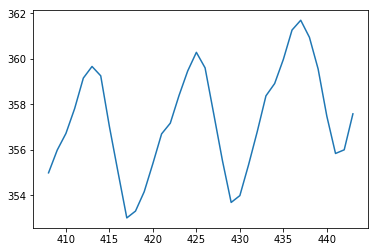

In [23]:
plt.plot(udc['IndexMois'][400:436], udc['CO2'][400:436])
for i in range(400,437):
    print(i, i%12, end=' / ')

On voit les maxima en 413 (mai), 425 (mai), 437(mai) et des les minima en 417 (septembre), 429 (septembre), 441 (septembre). L'hypothèse se tient.

Pour caractériser la croissance et faire des prévisions pour les années à venir, on souhaite joindre une courbe de tendance et son équation à ces données. On s'intéressera juste aux moyennes annuelles ici. 
On présente ici 3 "fit", respectivement linéaire, polynomial de degré 2 et exponentiel. On choisira par la suite celui qui nous semble le plus en adéquation.

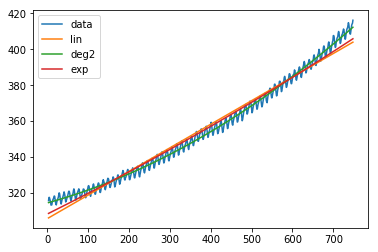

In [24]:
#Fit lineaire avec numpy
a, b = np.polyfit(udc['IndexMois'], udc['CO2'], 1)
yLin = a*udc['IndexMois'] + b

#Fit de degré 2
a2, b2, c2 = np.polyfit(udc['IndexMois'], udc['CO2'], 2)
yCarre = a2*udc['IndexMois']**2 + b2*udc['IndexMois'] + c2

#Fit exponentiel
aExp, bExp = np.polyfit(udc['IndexMois'], [np.log(y) for y in udc['CO2']], 1)
yExp = np.exp(bExp)*np.exp(aExp*udc['IndexMois'])

plt.plot(udc['IndexMois'], udc['CO2'], label='data')
plt.plot(udc['IndexMois'], yLin, label='lin')
plt.plot(udc['IndexMois'], yCarre, label='deg2')
plt.plot(udc['IndexMois'], yExp, label='exp')
plt.legend()

Le polynôme de degré 2 est plus adapté à nos données ici. Pour faire des extrapolations sur les années à suivre, il suffit de tracer la courbe en étendant sur la plage de valeurs des abscisses qui nous intéresse. Pour obtenir des valeurs annuelles moyennes, il suffit d'intégrer la fonction sur 12 mois.

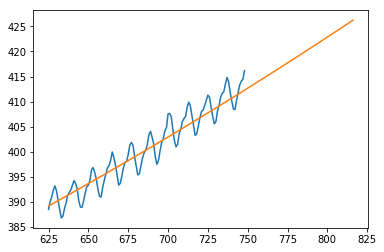

In [25]:
#on va afficher les valeurs de 2010 à 2025, sachant que nos données s'arrêtent à Avril 2020 (748)
borneJanvier2010 = (2010-1958)*12 + 1
borneDecembre2025 = (2025-1958)*12 +12
x1 = [x for x in range(borneJanvier2010, 749)]
x2 = [x for x in range(borneJanvier2010, borneDecembre2025+1)]

y1 = udc['CO2'][-(749-borneJanvier2010):]
y2 = a2*np.asarray(x2)**2 + b2*np.asarray(x2) + c2

plt.plot(x1, y1)
plt.plot(x2, y2)

In [26]:
#Valeurs moyennes : on peut se contenter d'une intégration manuelle ici
for x in range(2020, 2026):
    borneInf = (x-1958)*12
    borneSup = borneInf + 12
    Y2 = (a2*borneSup**3)/3 + (b2*borneSup**2)/2 + c2*borneSup
    Y1 = (a2*borneInf**3)/3 + (b2*borneInf**2)/2 + c2*borneInf
    meanValue = (Y2-Y1)/(borneSup-borneInf)
    print("valeur moyenne pour l'annee ", x, " : [CO2] = ", format(meanValue, '0.2f'), " ppm")

valeur moyenne pour l'annee  2020  : [CO2] =  412.69  ppm
valeur moyenne pour l'annee  2021  : [CO2] =  415.09  ppm
valeur moyenne pour l'annee  2022  : [CO2] =  417.52  ppm
valeur moyenne pour l'annee  2023  : [CO2] =  419.97  ppm
valeur moyenne pour l'annee  2024  : [CO2] =  422.45  ppm
valeur moyenne pour l'annee  2025  : [CO2] =  424.96  ppm


Pour finir, on peut vérifier nos résultats en comparant le fit avec les données réelles pour une année entièrement renseignée, 2019 par exemple.

In [27]:
#calcul avec data
newBorneInf = (2019-1958)*12+1  
newBorneSup = newBorneInf + 11
somme = 0
for x in range(newBorneInf, newBorneSup+1):
    somme += udc['CO2'][x]
    print(x, end = ' ')
print("")
newMean = somme/12

#calcul avec fit
newY2 = (a2*newBorneSup**3)/3 + (b2*newBorneSup**2)/2 + c2*newBorneSup
newY1 = (a2*(newBorneInf-1)**3)/3 + (b2*(newBorneInf-1)**2)/2 + c2*(newBorneInf-1) 
# on ne peut pas utiliser la même borne pour une intégration ou une somme ici sans omettre une valeur, d'où le -1
newMeanValue = (newY2-newY1)/12

print(newBorneInf, newBorneSup)
print("[CO2] (moyenne réelle) : \t", format(newMean, '0.2f'))
print("[CO2] (moyenne fit) : \t", format(newMeanValue, '0.2f'))

733 734 735 736 737 738 739 740 741 742 743 744 
733 744
[CO2] (moyenne réelle) : 	 411.28
[CO2] (moyenne fit) : 	 410.31


Le résultat est acceptable, on peut calculer l'erreur relative.

In [28]:
erreurRelative = (newMeanValue - newMean)/newMean
erreurRelative

-0.0023505910290639647

## Conclusion
Le but de cette étude était de produire une analyse reproductible de l'évolution de la concentration en CO2 dans l'atmosphère. Les données de base permettent une étude de 1958 à 2020, modulo les données manquantes.
En utilisant les librairies Pandas et Numpy pour traiter les données, nous avons constaté une croissance globale de la concentration en CO2 d'année en année, couplée à une oscillation de cette concentration avec des maxima autour de Mai et des minima autour de Septembre. Après quelques recherches, sur [cette page](https://en.wikipedia.org/wiki/Keeling_Curve), l'augmentation globale serait due à l'utilisation des énergies fossiles, et l'oscillation annuelle à l'effet de la photosynthèse de la flore terrestre.
Nous avons ensuite appliqué 3 fonctions différentes pour trouver une courbe de tendance raisonnable pour notre jeu de données. Le choix s'est fait sur un polynôme de degré 2, qui est un bon compromis car il suit de près les données sans pour autant être trop complexe à traiter.
Ce fit a ensuite permis d'extrapoler les valeurs moyennes des concentrations en CO2 pour les années 2020 à 2025. Une vérification sur l'année 2019 pour laquelle l'intégralité des données sont disponibles suggère une erreur relative inférieure au pourcent (0.2% en l'occurence), ce qui est semble acceptable.
Pour compléter cette étude, un travail possible serait de caractériser l'oscillation de la concentration en CO2 dans l'année par une fonction sinusoidale par exemple.